# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import shap
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [181]:
url = 'https://raw.githubusercontent.com/fathiyyaa/Proyek-Machine-Learning/main/data/data_berlabel.csv'
df = pd.read_csv(url, sep=',')

df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,cluster
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,1
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,0
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,0
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,1


### Praproses Data

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [183]:
# keluarkan variabel tidak trpakai
df = df.drop(columns=['TransactionID','AccountID'])

In [184]:
label_encoder = LabelEncoder()

# Identifikasi semua kolom kategorikal secara otomatis
categorical_columns = df.select_dtypes(include=['object']).columns

# Encode setiap kolom kategorikal
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Tampilkan DataFrame setelah encoding
print(df.head())


   TransactionAmount  TransactionDate  TransactionType  Location  DeviceID  \
0              14.09              684                1        36       365   
1             376.24             1192                1        15        50   
2             126.29             1276                1        23       229   
3             184.50              823                1        33       182   
4              13.45             1959                0         1       298   

   IP Address  MerchantID  Channel  CustomerAge  CustomerOccupation  \
0         186          14        0           70                   0   
1          82          51        0           68                   0   
2         343           8        2           19                   3   
3         300           1        2           26                   3   
4         501          90        2           26                   3   

   TransactionDuration  LoginAttempts  AccountBalance  \
0                   81              1         5

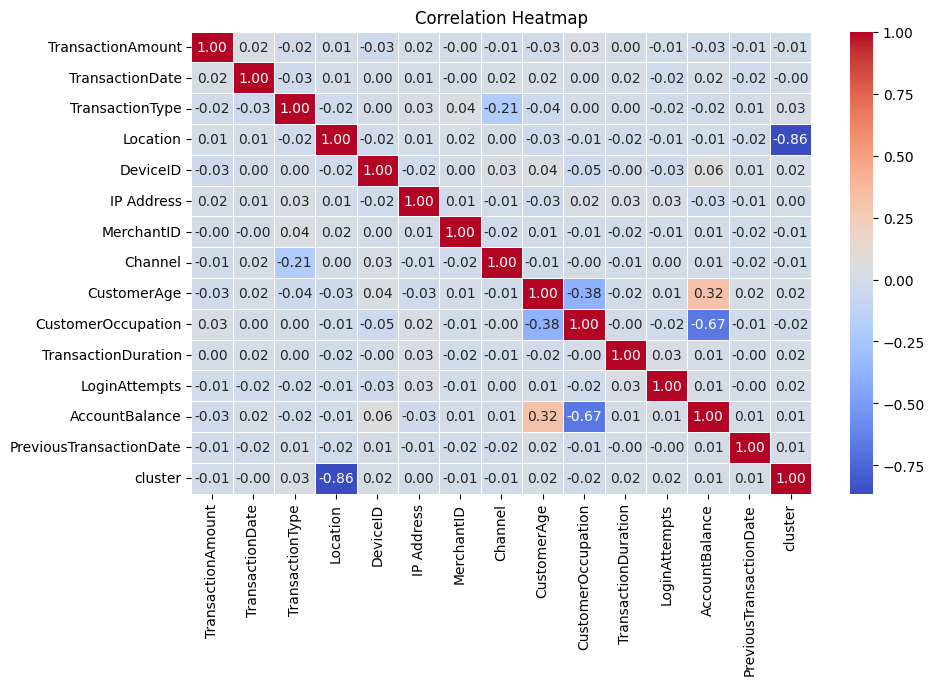

In [185]:
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [186]:
df2 = df.copy()

In [187]:
df = df.drop(columns=['Location'])

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [188]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['cluster'])
y = df['cluster']
feature_names = X.columns

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(1758, 13), y_train=(1758,)
Test set shape: X_test=(754, 13), y_test=(754,)


In [189]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
numeric_columns = df2.select_dtypes(include=['int64', 'float64']).columns
df2[numeric_columns] = scaler.fit_transform(df2[numeric_columns])

# Pisahkan fitur (X) dan target (y)
X2 = df2.drop(columns=['cluster'])
y2 = df2['cluster']
feature_names2 = X2.columns

# Split data menjadi set pelatihan dan set uji
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train2.shape}, y_train={y_train2.shape}")
print(f"Test set shape: X_test={X_test2.shape}, y_test={y_test2.shape}")

Training set shape: X_train=(1758, 14), y_train=(1758,)
Test set shape: X_test=(754, 14), y_test=(754,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [190]:
rf = RandomForestClassifier(n_estimators=500, random_state=42).fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)

In [191]:
importances = rf.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False)
print(feature_imp_df)

                    Feature  Gini Importance
3                  DeviceID         0.110639
1           TransactionDate         0.107108
11           AccountBalance         0.106745
4                IP Address         0.105835
0         TransactionAmount         0.105490
12  PreviousTransactionDate         0.105341
9       TransactionDuration         0.102150
5                MerchantID         0.095800
7               CustomerAge         0.088153
6                   Channel         0.025763
8        CustomerOccupation         0.023966
2           TransactionType         0.013356
10            LoginAttempts         0.009651


In [119]:
selected_features = feature_imp_df[feature_imp_df["Gini Importance"] > 0.03]["Feature"]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

Membangun model random forest denagn 500 poohn dan SVM. kemudian di cek feature importances random forest diambil yang nilai gini>0.03

### DF2

In [192]:
rf_2 = RandomForestClassifier(n_estimators=500, random_state=42).fit(X_train2, y_train2)
svm_2 = SVC().fit(X_train2, y_train2)

In [193]:
importances2 = rf_2.feature_importances_
feature_imp_df2 = pd.DataFrame({'Feature': feature_names2, 'Gini Importance': importances2}).sort_values('Gini Importance', ascending=False)
print(feature_imp_df2)

                    Feature  Gini Importance
3                  Location         0.871464
4                  DeviceID         0.016166
1           TransactionDate         0.014096
12           AccountBalance         0.013963
13  PreviousTransactionDate         0.013446
5                IP Address         0.013377
0         TransactionAmount         0.012835
10      TransactionDuration         0.012626
6                MerchantID         0.012212
8               CustomerAge         0.011707
7                   Channel         0.002846
9        CustomerOccupation         0.002529
11            LoginAttempts         0.001396
2           TransactionType         0.001337


Membangun model random forest denagn 500 poohn dan SVM. kemudian di cek feature importances random forest tetapi cuma location fitur yang berpengaruh

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [194]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': int(tp),
        'False Positive (FP)': int(fp),
        'False Negative (FN)': int(fn),
        'True Negative (TN)': int(tn),
        'Accuracy': round(accuracy_score(y_test, y_pred), 4),
        'Precision': round(precision_score(y_test, y_pred), 4),
        'Recall': round(recall_score(y_test, y_pred), 4),
        'F1-Score': round(f1_score(y_test, y_pred), 4)
    }
    return results

# =================
# Print rapi hanya disini
# =================

def print_results(results):
    for k, v in results.items():
        print(f"{k:<25}: {v}")

### Random Forest

In [195]:
results = evaluate_model(rf, X_train, y_train)
print_results(results)

Confusion Matrix         : [[900   0]
 [  0 858]]
True Positive (TP)       : 858
False Positive (FP)      : 0
False Negative (FN)      : 0
True Negative (TN)       : 900
Accuracy                 : 1.0
Precision                : 1.0
Recall                   : 1.0
F1-Score                 : 1.0


In [196]:
results = evaluate_model(rf, X_test, y_test)
print_results(results)

Confusion Matrix         : [[212 169]
 [201 172]]
True Positive (TP)       : 172
False Positive (FP)      : 169
False Negative (FN)      : 201
True Negative (TN)       : 212
Accuracy                 : 0.5093
Precision                : 0.5044
Recall                   : 0.4611
F1-Score                 : 0.4818


Terindikasi overfitting

### pakai fiture selection

In [198]:
# Gunakan hanya fitur yang dipilih
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Latih ulang RF dengan fitur yang lebih sedikit
clf_selected = RandomForestClassifier(n_estimators=500, random_state=42)
clf_selected.fit(X_train_selected, y_train)

# Evaluasi performa
results = evaluate_model(clf_selected, X_train_selected, y_train)
print_results(results)


Confusion Matrix         : [[900   0]
 [  0 858]]
True Positive (TP)       : 858
False Positive (FP)      : 0
False Negative (FN)      : 0
True Negative (TN)       : 900
Accuracy                 : 1.0
Precision                : 1.0
Recall                   : 1.0
F1-Score                 : 1.0


In [199]:
results = evaluate_model(clf_selected, X_test_selected, y_test)
print_results(results)

Confusion Matrix         : [[202 179]
 [203 170]]
True Positive (TP)       : 170
False Positive (FP)      : 179
False Negative (FN)      : 203
True Negative (TN)       : 202
Accuracy                 : 0.4934
Precision                : 0.4871
Recall                   : 0.4558
F1-Score                 : 0.4709


#### pakai df2

In [200]:
results = evaluate_model(rf_2, X_train2, y_train2)
print_results(results)

Confusion Matrix         : [[900   0]
 [  0 858]]
True Positive (TP)       : 858
False Positive (FP)      : 0
False Negative (FN)      : 0
True Negative (TN)       : 900
Accuracy                 : 1.0
Precision                : 1.0
Recall                   : 1.0
F1-Score                 : 1.0


In [201]:
results = evaluate_model(rf_2, X_test2, y_test2)
print_results(results)

Confusion Matrix         : [[381   0]
 [  0 373]]
True Positive (TP)       : 373
False Positive (FP)      : 0
False Negative (FN)      : 0
True Negative (TN)       : 381
Accuracy                 : 1.0
Precision                : 1.0
Recall                   : 1.0
F1-Score                 : 1.0


### SVM

In [148]:
results = evaluate_model(svm, X_train, y_train)
print_results(results)

Confusion Matrix         : [[626 335]
 [442 481]]
True Positive (TP)       : 481
False Positive (FP)      : 335
False Negative (FN)      : 442
True Negative (TN)       : 626
Accuracy                 : 0.5876
Precision                : 0.5895
Recall                   : 0.5211
F1-Score                 : 0.5532


In [149]:
results = evaluate_model(svm, X_test, y_test)
print_results(results)

Confusion Matrix         : [[216 104]
 [141 167]]
True Positive (TP)       : 167
False Positive (FP)      : 104
False Negative (FN)      : 141
True Negative (TN)       : 216
Accuracy                 : 0.6099
Precision                : 0.6162
Recall                   : 0.5422
F1-Score                 : 0.5769


### pakai df2

In [202]:
results = evaluate_model(svm_2, X_train2, y_train2)
print_results(results)

Confusion Matrix         : [[896   4]
 [  4 854]]
True Positive (TP)       : 854
False Positive (FP)      : 4
False Negative (FN)      : 4
True Negative (TN)       : 896
Accuracy                 : 0.9954
Precision                : 0.9953
Recall                   : 0.9953
F1-Score                 : 0.9953


In [203]:
results = evaluate_model(svm_2, X_test2, y_test2)
print_results(results)

Confusion Matrix         : [[358  23]
 [ 13 360]]
True Positive (TP)       : 360
False Positive (FP)      : 23
False Negative (FN)      : 13
True Negative (TN)       : 358
Accuracy                 : 0.9523
Precision                : 0.9399
Recall                   : 0.9651
F1-Score                 : 0.9524


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

### RF

In [205]:
# Definisikan parameter grid untuk Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Output hasil terbaik
print(f"Best parameters (Grid Search): {grid_search.best_params_}")
best_rf_grid = grid_search.best_estimator_

# Evaluasi performa model pada test set
grid_search_score = best_rf_grid.score(X_test, y_test)
print(f"Accuracy after Grid Search: {grid_search_score:.2f}")

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters (Grid Search): {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy after Grid Search: 0.50


In [145]:
rf_new = RandomForestClassifier(
    n_estimators=100,  # Kurangi jumlah pohon
    max_depth=20,  # Batasi kedalaman pohon
    min_samples_split=5,  # Harus ada 30 sampel sebelum split
    min_samples_leaf=15,  # Setiap leaf harus punya minimal 15 data
    max_features='sqrt',  # Kurangi jumlah fitur yang digunakan setiap split
    class_weight='balanced',  # Kalau kelas tidak benar-benar seimbang
    random_state=42
)
rf_new.fit(X_train_selected, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=15, min_samples_split=5,
                       random_state=42)

### SVM

In [156]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 0.01],
    'kernel': ['rbf']
}


grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)
print(grid.best_params_)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [152]:
from sklearn.pipeline import Pipeline

In [157]:
model_svm = SVC(C=10, gamma='scale', kernel='rbf', class_weight='balanced')

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', model_svm)
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(C=10, class_weight='balanced'))])

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

### RF

In [146]:
results = evaluate_model(rf_new, X_train_selected, y_train)
print_results(results)

Confusion Matrix         : [[858 103]
 [ 99 824]]
True Positive (TP)       : 824
False Positive (FP)      : 103
False Negative (FN)      : 99
True Negative (TN)       : 858
Accuracy                 : 0.8928
Precision                : 0.8889
Recall                   : 0.8927
F1-Score                 : 0.8908


In [147]:
results = evaluate_model(rf_new, X_test_selected, y_test)
print_results(results)

Confusion Matrix         : [[167 153]
 [157 151]]
True Positive (TP)       : 151
False Positive (FP)      : 153
False Negative (FN)      : 157
True Negative (TN)       : 167
Accuracy                 : 0.5064
Precision                : 0.4967
Recall                   : 0.4903
F1-Score                 : 0.4935


Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

### SVM

In [158]:
results_train = evaluate_model(pipeline, X_train, y_train)
print_results(results_train)

results_test = evaluate_model(pipeline, X_test, y_test)
print_results(results_test)


Confusion Matrix         : [[852 109]
 [164 759]]
True Positive (TP)       : 759
False Positive (FP)      : 109
False Negative (FN)      : 164
True Negative (TN)       : 852
Accuracy                 : 0.8551
Precision                : 0.8744
Recall                   : 0.8223
F1-Score                 : 0.8476
Confusion Matrix         : [[176 144]
 [173 135]]
True Positive (TP)       : 135
False Positive (FP)      : 144
False Negative (FN)      : 173
True Negative (TN)       : 176
Accuracy                 : 0.4952
Precision                : 0.4839
Recall                   : 0.4383
F1-Score                 : 0.46


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Sebelumnya pada dataset saya terdapat korelasi yang sangat besar antara label denagn variabel location. Saat dicoba pada metode RF dan SVM hasilnya terlalu bagus bakhan akurasi mencapai 1, apa ini termasuk overfit atau ada alasan lain kenapa bisa seperti itu, serta langkah apa yang bisa dilakukan untuk  mengatasinya? Berikut diberikan analisis jika tidak pakai variabel location:

**Rangkuman Analisis**

**Random Forest**

Sebelum Tuning:
- Accuracy (Train): 1.0000, F1-Score (Train): 1.0000, Precision (Train): 1.0000, Recall (Train): 1.0000

- Accuracy (Test): 0.5093, F1-Score (Test): 0.4818, Precision (Test): 0.5044, Recall (Test): 0.4611

Setelah Tuning:
- Accuracy (Train): 0.8928, F1-Score (Train): 0.8908, Precision (Train): 0.8889, Recall (Train): 0.8927

- Accuracy (Test): 0.5064, F1-Score (Test): 0.4935, Precision (Test): 0.4967, Recall (Test): 0.4903

Tuning berhasil mengurangi overfitting pada data latih, ditunjukkan dengan penurunan skor training menjadi lebih wajar (tidak 100%). Namun, performa pada data uji masih belum mengalami perbaikan yang signifikan. Model masih kesulitan dalam membedakan kelas dengan baik dan mengalami precision serta recall yang rendah.

**SVM**

Sebelum Tuning:
- Accuracy (Train): 0.5876, F1-Score (Train): 0.5532, Precision (Train): 0.5895, Recall (Train): 0.5211

-  Accuracy (Test): 0.6099, F1-Score (Test): 0.5769, Precision (Test): 0.6162, Recall (Test): 0.5422

SVM menunjukkan performa yang cukup rendah baik pada data latih maupun data uji. Nilai precision dan recall masih tergolong rendah (<0.62) sehingga kemampuan deteksi antar kelas masih kurang akurat. Namun model belum menunjukkan overfitting yang parah, terlihat dari performa train dan test yang seimbang.

Setelah Tuning:
- Accuracy (Train): 0.8551, F1-Score (Train): 0.8476, Precision (Train): 0.8744, Recall (Train): 0.8223

- Accuracy (Test): 0.4952, F1-Score (Test): 0.4600, Precision (Test): 0.4839, Recall (Test): 0.4383

Setelah tuning, model berhasil meningkatkan performa pada data latih secara signifikan, tetapi justru menurun drastis pada data uji. Hal ini menunjukkan bahwa model mengalami overfitting setelah tuning, di mana model terlalu menyesuaikan diri dengan pola pada data latih namun gagal untuk generalisasi ke data uji. Precision dan recall pada data uji menurun di bawah 50%.